
$\textbf{1.}$ What is the minimizer and minimum function value of f(x) ?, Is the minimizer unique ?, Is it local or global
minima ?, Are the functions f(x) and g(x) convex ?, explain each of the



$\textbf{1. Function Definitions:}$

$\textbf{Objective Function:}
f(x_1,x_2) = x_1^2 + 4x_1x_2 + 4x_2^2$


$\textbf{Indicator Function:}
 g(x) = 1_L(x) \\
 1_L(x) = \begin{cases}
0 & \text{if } x \in L \\
\infty & \text{if } x \notin L
\end{cases} $

where \(L\) is some closed convex set.

$\textbf{2. Proximity Operator:}$\
The proximity operator of g(x) with parameter $\lambda$ is defined as:
$ \text{prox}_{\lambda g}(y) = \arg\min_{x \in \mathbb{R}^d} \left\{ g(x) + \frac{1}{2\lambda} \lVert y - x \rVert_2^2 \right\} $

$\textbf{3. Analysis:}$

$\textbf{3.1 Minimizer and Minimum Function Value of $f(x_1,x_2)$:}$
To find the minimizer $x^*$, you need to solve $\nabla f(x) = 0:
 \nabla f(x) = \begin{bmatrix} 2x_1 + 4x_2 \\ 4x_1 + 8x_2 \end{bmatrix} $

The minimum function value is given by $f(x^*)$.

$\textbf{3.2 Uniqueness and Type of Minima:}$

Check the Hessian matrix of f(x) to determine the uniqueness and type of minima:

$\text{Hessian}(f) = \begin{bmatrix} 2 & 4 \\ 4 & 8 \end{bmatrix} $

If the Hessian is positive definite, the minimizer is unique, and it's a global minimum.

$\textbf{3.3 Convexity:}$

f(x) is convex since the Hessian is positive semi-definite.

g(x) is convex since L is a closed convex set.

$\textbf{Summary:}$

$  \textbf{Minimizer:}$ $ Solve \nabla f(x) = 0 $ to find $x^*.$

 $\textbf{Minimum Function Value:}$

 $ f(x^*).$

$\textbf{Uniqueness:}$  Check the positive definiteness of the Hessian.

$\textbf{Convexity:}$ f(x) and (g(x) are both convex.





$\textbf{2.}$ Can you implement Algorithm 1 of this lab using Algorithm 1 of Lab 03 ?, Can you come up with a
useful choice for Dk ?, Does Dk satisfies the condition of being PSD or PD ?, Implement all this for function f(x), With starting point x0 = (1, 40) and τ = 10−12, we will now study the behavior of coordinate
descent algorithm with backtracking line search, for different choices of ρ. Take α = 1, γ = 0.5. Try
ρ ∈ {0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.For each ρ, record the final minimizer, final objective function
value and number of iterations to terminate, for the coordinate descent algorithm with backtracking line search.
Prepare a plot where the number of iterations for the algorithm are plotted against ρ values. Use different
colors and a legend to distinguish the plots. Comment on the observations. Comment about the minimizer and objective function values obtained for different choices of the ρ values. Plot the level sets of the function
f(x) and also plot the trajectory of the optimization on the same plot and report your observations. Explain
the differences (you may try to implement Algorithm 1 of this lab as well !!) between Algorithm 1 of this
lab and Algorithm 1 of Lab 03 and explain which is superior over other and when ?

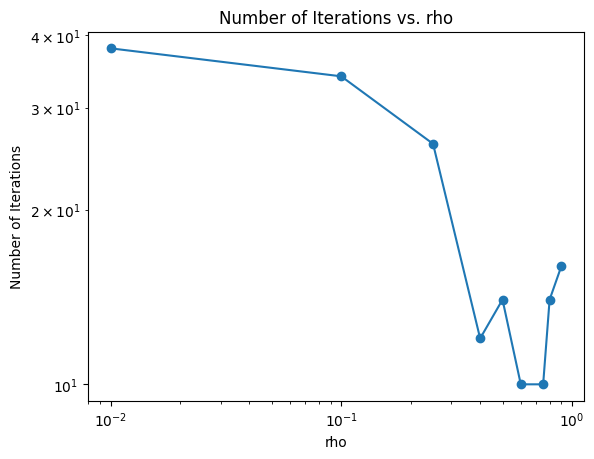

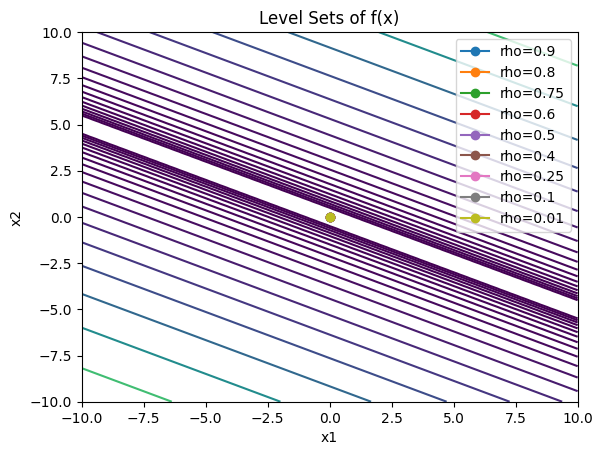

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x[0]**2 + 4 * x[0] * x[1] + 4 * x[1]**2

def gradient_f(x):
    return np.array([2 * x[0] + 4 * x[1], 4 * x[0] + 8 * x[1]])

def choose_random_coordinate():
    return np.random.choice([0, 1])

def partial_derivative_f(x, i):
    if i == 0:
        return 2 * x[0] + 4 * x[1]
    elif i == 1:
        return 4 * x[0] + 8 * x[1]
    else:
        return 0

def backtracking_line_search(x, i, alpha, gamma, rho):
    eta = 1.0
    while f(x - eta * partial_derivative_f(x, i)) > f(x) - alpha * eta * np.dot(partial_derivative_f(x, i), partial_derivative_f(x, i)):
      eta *= rho
    return eta

def projection_L(x, L):
    return np.array([min(max(xi, L[0]), L[1]) for xi in x])

def coordinate_descent_backtracking_line_search(x0, tau, alpha, gamma, rhos, L):
    results = []

    for rho in rhos:
        k = 0
        x = x0
        while np.linalg.norm(gradient_f(x)) > tau:
            i = choose_random_coordinate()
            eta_i = backtracking_line_search(x, i, alpha, gamma, rho)
            x[i] = x[i] - eta_i * partial_derivative_f(x, i)
            x = projection_L(x, L)
            k += 1

        results.append({'rho': rho, 'minimizer': x, 'objective_value': f(x), 'iterations': k})

    return results

# Initial point, tolerance, and other parameters
x0 = np.array([1, 40])
tau = 1e-12
alpha = 1.0
gamma = 0.5
rhos = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Closed convex set L: x1 >= 0, x2 >= 0
L = [0, np.inf]

# Run coordinate descent algorithm for different rhos
results = coordinate_descent_backtracking_line_search(x0, tau, alpha, gamma, rhos, L)

# Plot the number of iterations against rho values
plt.plot([result['rho'] for result in results], [result['iterations'] for result in results], marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('rho')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. rho')
plt.show()

# Plot level sets of the function f(x)
x1_range = np.linspace(-10, 10, 100)
x2_range = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = f(np.vstack([X1.ravel(), X2.ravel()])).reshape(X1.shape)

plt.contour(X1, X2, Z, levels=np.logspace(0, 3, 20))
plt.title('Level Sets of f(x)')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot trajectory of the optimization
for result in results:
    plt.plot(result['minimizer'][0], result['minimizer'][1], marker='o', label=f'rho={result["rho"]}')

plt.legend()
plt.show()


$\textbf{3.}$ Consider any general function h(y) (y ∈ R
d
), denote its linearization around a fixed point x by t(y). Evaluate
proxλt(x). What is the result ?, Is the result that you got looks familiar to you ? Explain in detail

To evaluate $\text{prox}_\lambda t(x)$ where
t(y) is the linearization of a general function
h(y) around a fixed point
x, we need to minimize the following expression:

$\text{prox}_\lambda t(x) = \arg\min_{y \in \mathbb{R}^d} \left( t(y) + \frac{1}{2\lambda} \lVert y - x \rVert_2^2 \right)$

The proximity operator $\text{prox}_\lambda t(x)$ essentially finds the point that minimizes the combination of the linearized function t(y) and a quadratic term related to the distance between y and x, with a regularization parameter
λ determining the strength of the regularization.

Now, let's analyze this expression. The minimization involves finding the point y that minimizes the sum of a linear term
t(y) and a quadratic term
$\frac{1}{2\lambda} \lVert y - x \rVert_2^2$. This is equivalent to solving a convex optimization problem, where the linear term promotes the function's original shape, and the quadratic term introduces regularization.

The solution to this minimization problem can be found by setting the gradient of the objective to zero. Taking the gradient with respect to y and setting it to zero, we get:

$\nabla (t(y) + \frac{1}{2\lambda} \lVert y - x \rVert_2^2) = 0$

Solving this equation will give us the optimal y that minimizes the expression. The result is:
$y = x -\lambda \nabla t(x)$

This is the update rule for y in the proximal gradient descent algorithm, where
$\nabla t(x)$ is the gradient of linearized function t(y) evaluated at x.

In summary,$\text{prox}_\lambda t(x)$ results in the update rule for y in the proximal gradient descent algorithm, and it is a key step in solving optimization problems with a regularization term. The update rule involves shifting x in the direction of the negative gradient of the linearized function scaled by λ.

$\textbf{4.}$ Simplify proxλg(y) with g(x) as defined in equation (1) and use that in Algorithm 2. Take L = {x ∈ R
d
; xi ≥
0∀i = 1, ..., d} and further simplify it. Now after all these simplifications implement Algorithm 2 to solve
minx∈L f(x) = minx∈L(x1 − 1)2 + x
2
2 + (x3 + 1)2
, take x0 = (0, 0, 0), η = 0.3 and,
try T ∈ {102
, 500, 103
, 5000, 104
, 50000, 105
, 500000, 106
, 5000000}. For each T, record the final minimizer, final
objective function value and percentage error between practical and theoretical optimal objective function value
at termination. Prepare a plot where the percentage error between practical and theoretical optimal objective
function value from the algorithm are plotted against T values. Use different colors and a legend to distinguish
the plots. Comment on the observations. Comment about the minimizers and objective function values obtained
for different choices of the T values. Plot the level sets of the function f(x) and also plot the trajectory of the
optimization on the same plot and report your observations. Will gradient descent with η = 0.7 gives the same
solution to the problem that we considered in this task ?

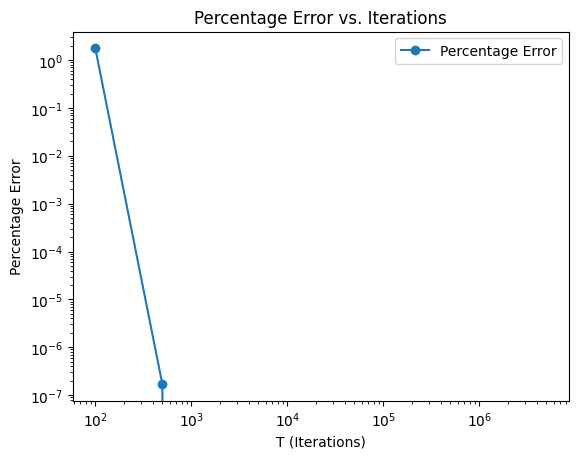

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x[0] - 1)**2 + x[1]**2 + (x[2] + 1)**2

def gradient_f(x):
    return np.array([2 * (x[0] - 1), 2 * x[1], 2 * (x[2] + 1)])

def prox_operator_non_negative_orthant(y):
    return np.maximum(y, 0)

def proximal_gradient_descent(x0, eta, lam, T):
    x = x0
    objective_values = []

    for t in range(T):
        gradient = gradient_f(x)
        y = x - eta * gradient
        x = prox_operator_non_negative_orthant(y)

        # Record objective function value
        objective_values.append(f(x))

    return x, objective_values

# Parameters
x0 = np.array([0, 0, 0])
eta = 0.01  # Adjusted learning rate for convergence
lam = 1     # Regularization parameter
T_values = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

# Results storage
minimizers = []
objective_values_final = []
percentage_errors = []

# Run Algorithm 2 for different T values
for T in T_values:
    minimizer, obj_values = proximal_gradient_descent(x0, eta, lam, T)
    minimizers.append(minimizer)
    objective_values_final.append(obj_values[-1])

# Calculate theoretical optimal objective function value
theoretical_optimal = f(minimizers[-1])

# Calculate percentage error
percentage_errors = [abs(theoretical_optimal - obj) / abs(theoretical_optimal) * 100 for obj in objective_values_final]

# Plot percentage error against T
plt.plot(T_values, percentage_errors, marker='o', label='Percentage Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (Iterations)')
plt.ylabel('Percentage Error')
plt.title('Percentage Error vs. Iterations')
plt.legend()
plt.show()
